In [1]:
from math import *
import numpy as np
# from scipy.optimize import fsolve
import matplotlib
import matplotlib.pyplot as plt

print("Sucess!")

Sucess!


In [7]:
# Question1

v_f = 1.952E-3 # [m^3/kg]
v_g = 0.06858 # [m^3/kg]
volume = 20 # [L]
V = volume * (1/1000) # [m^3]

V_f = (2/3)*V # [m^3]
V_g = (1/3)*V # [m^3]

m = ((1/v_f)*V_f) + ((1/v_g)*V_g) # [kg]

print("V_f = %0.4e" % V_f)
print("V_g = %0.4e" % V_g)
print("m = %0.4e" % m)
print("\n")

x = ((1/v_g)*V_g) / ((1/v_f)*V_f + (1/v_g)*V_g)

print("x = %0.4f" % x)

V_f = 1.3333e-02
V_g = 6.6667e-03
m = 6.9278e+00


x = 0.0140
Hello from a function


In [3]:
# Question5

# A) Find Cp and Cv at 298K for CO and compare to tabulated values
T = 298 # [k]
theta = T / 1000 # [k]
k = 1.399

C_0 = 1.10
C_1 = -0.46
C_2 = 1.0
C_3 = -0.454

Cp_theta = C_0 + (C_1 * theta) + (C_2 * theta**2) + (C_3 * theta**3)
Cv_theta = Cp_theta / k

print("Cp_theta for T=%0.1f [k] = %0.4f" % (T, Cp_theta))
print("Cv_theta for T=%0.1f [k] = %0.4f" % (T, Cv_theta))

Cp_theta for T=298.0 [k] = 1.0397
Cv_theta for T=298.0 [k] = 0.7432


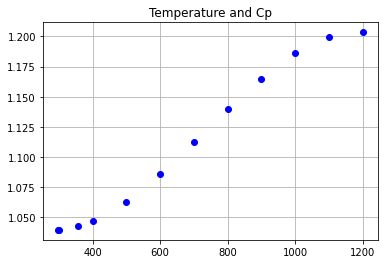

In [3]:
# Question5

# B) Find the specific heat capacity at 500 K and 1200 K. Comment on the trend that you observe

temperatures = np.array([298, 300, 357, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]) # [k]
num_cols = temperatures.size
xVals = np.zeros(num_cols)
yVals = np.zeros(num_cols)

k = 1.399

C_0 = 1.10
C_1 = -0.46
C_2 = 1.0
C_3 = -0.454

for index, T in enumerate(temperatures):

    theta = T / 1000 # [k]

    Cp_theta = C_0 + (C_1 * theta) + (C_2 * theta**2) + (C_3 * theta**3)
    Cv_theta = Cp_theta / k

    # print("Cp_theta for T=%0.1f [k] = %0.4f" % (T, Cp_theta))
    # print("Cv_theta for T=%0.1f [k] = %0.4f" % (T, Cv_theta))
    # print("\n")

    xVals[index] = T
    yVals[index] = Cp_theta



plt.plot(xVals, yVals, 'bo')
plt.title("Temperature and Cp")
plt.grid(True)



In [3]:
# Question5

# C) Modify your script to find the change in enthalpy for Carbon Monoxide between 298 K and 500 K
# Recall deltaH = Cp * deltaT --> integrate numerically

temperature1 = 298 # [k]
temperature2 = 500 # [k]

k = 1.399

C_0 = 1.10
C_1 = -0.46
C_2 = 1.0
C_3 = -0.454

# Set up the integration
temperatureVals = np.linspace(temperature1, temperature2, 1000)
CpVals = np.zeros(temperatureVals.shape, dtype = float)

# Fill in the CpVals
for index, T in enumerate(temperatureVals):

    theta = temperatureVals[index] / 1000
    Cp = C_0 + (C_1 * theta) + (C_2 * theta**2) + (C_3 * theta**3)
    CpVals[index] = Cp

# Perform the integration using trapezoidal rule
deltaH = 0
for index, T in enumerate(temperatureVals[:-1]):
    
    deltaH += (temperatureVals[index+1] - temperatureVals[index]) * ((1/2) * (CpVals[index] +  CpVals[index+1]))
    # deltaH += (CpVals[index+1] * temperatureVals[index+1]) - (CpVals[index] * temperatureVals[index])
    # print(deltaH)

print("deltaH = %0.4f" % deltaH)



deltaH = 211.7717


In [6]:
# Question5

# D) Calculate the enthalpy change between 298 K and 500 K assuming constant Cp at 298 [k]

temperature1 = 298 # [k]
temperature2 = 500 # [k]

theta = temperature1 / 1000 # [k]

C_0 = 1.10
C_1 = -0.46
C_2 = 1.0
C_3 = -0.454

Cp_theta = C_0 + (C_1 * theta) + (C_2 * theta**2) + (C_3 * theta**3)

deltaH = Cp_theta*temperature2 - Cp_theta*temperature1

print("Cp_theta = %0.4f" % Cp_theta)
print("deltaH = %0.4f" % deltaH)

Cp_theta = 1.0397
deltaH = 210.0213


In [8]:
# Question5

# E) Compare the enthalpy change calculated using your script, the constant cp assumption, and tabulated values
# Comment on which you believe to be the most accurate.

temperature1 = 298 # [k]
temperature2 = 500 # [k]

theta1 = temperature1 / 1000 # [k]
theta2 = temperature2 / 1000 # [k]

C_0 = 1.10
C_1 = -0.46
C_2 = 1.0
C_3 = -0.454

# Set up the integration
temperatureVals = np.linspace(temperature1, temperature2, 1000)
CpVals = np.zeros(temperatureVals.shape, dtype = float)

# Fill in the CpVals
for index, T in enumerate(temperatureVals):

    theta = temperatureVals[index] / 1000
    Cp = C_0 + (C_1 * theta) + (C_2 * theta**2) + (C_3 * theta**3)
    CpVals[index] = Cp

# Perform the integration using trapezoidal rule
deltaH_accurate = 0
for index, T in enumerate(temperatureVals[:-1]):
    
    deltaH_accurate += (temperatureVals[index+1] - temperatureVals[index]) * ((1/2) * (CpVals[index] +  CpVals[index+1]))
    # deltaH += (CpVals[index+1] * temperatureVals[index+1]) - (CpVals[index] * temperatureVals[index])
    # print(deltaH)
    
# ---------------------------------------------------------------------------------------------------------------

Cp_table = 1.041 # []

deltaH_table = Cp_table*temperature2 - Cp_table*temperature1

print("deltaH_accurate = %0.4f" % deltaH_accurate)
print("deltaH_table = %0.4f" % deltaH_table)




deltaH_accurate = 211.7717
deltaH_table = 210.2820
